# 解方程

和计算算式不同,解方程是知道结果求变量,作为符号运算工具,sympy在解方程方面非常直观

In [1]:
from sympy import init_printing
init_printing(use_unicode=True)

In [2]:
from sympy import symbols
x, y, z = symbols('x y z')

## 相等

python中`=`是赋值,`==`是判断相等,而在SymPy中使用函数`Eq(exp1,exp2)`来表示两个算式相等

In [3]:
from sympy import Eq

In [4]:
Eq(x,y)

## 求解方程


求解方程使用`solveset(Eq(expr, result), var)`来实现.求解方程本质上是求方程的解集,因此其返回值是一个集合,集合计算会在后面介绍

In [5]:
from sympy import solveset

In [6]:
solveset(Eq(x**2, 1), x)

因为就一个参数所以x可以省略

In [7]:
solveset(Eq(x**2, 1))

如果第一个参数不是等式,那么默认的`solveset`将会把它作为等于0处理
`solveset(expr, var)`

In [8]:
solveset(x**2-1, x)

其实`solveset(equation, variable=None, domain=S.Complexes)->Set`才是solveset的完整接口,而domain则表示域(取值范围集合),SymPy支持的域包括:


+ `S.Naturals`表示自然数(或计数数),即从1开始的正整数($ℕ$)
+ `S.Naturals0`非负整数($ℕ0$)
+ `S.Integers`整数($Z$)
+ `S.Reals`实数($R$)
+ `S.Complexes`复数($C$)
+ `S.EmptySet`空域($\emptyset$)

In [11]:
from sympy import S,sin,cos,exp

In [10]:
solveset(x - x, x, domain=S.Reals)

In [15]:
solveset(sin(x) - 1, x, domain=S.Reals)

如果无解,那么结果就是一个空集

In [18]:
solveset(exp(x), x)     # No solution exists

In [15]:
solveset(cos(x) - x, x) 

## 求方程组

求方程组可以用`linsolve(exps...,(vars...))-> Set`函数

In [22]:
from sympy import linsolve

In [23]:
linsolve([x + y + z - 1,
          x + y + 2*z - 3 ], (x, y, z))

当然也可以使用矩阵的方式,矩阵将在下一部分学习

In [27]:
from sympy import Matrix

In [25]:
A=Matrix([[1,1,1],[1,1,2]])

In [29]:
b = Matrix([[1],[3]])

In [31]:
linsolve((A,b,),(x,y,z,))

## 求解微分方程

`dsolve()`是微分方程的求解函数

In [33]:
from sympy import Function,dsolve

In [34]:
f, g = symbols('f g', cls=Function)

In [35]:
f(x)

In [36]:
f(x).diff(x)

In [37]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x),
            sin(x))

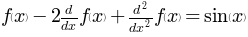

In [38]:
diffeq

In [39]:
dsolve(diffeq, f(x))

In [41]:
f(x).diff(x)*(1 - sin(f(x)))

In [40]:
dsolve(f(x).diff(x)*(1 - sin(f(x))),
       f(x))